# Homework 5
# Margaret Doyle
# margaret.doyle@berkeley.edu

## 1) Use the data supplied of airport codes (ICAO_airports.csv) and top airports (op_airports.csv) to make a table of 50 most travelled airports in the US and containing relevant information, like name, wikipedia link, latitude, longitude

In [2]:
import sqlite3
import pandas as pd

df1 = pd.read_csv('/Users/yyk_lab/Downloads/ay250-hw/python-ay250-homework/python-seminar/Homeworks/hw_5/hw_5_data/ICAO_airports.csv')
df2 = pd.read_csv('/Users/yyk_lab/Downloads/ay250-hw/python-ay250-homework/python-seminar/Homeworks/hw_5/hw_5_data/top_airports.csv')

#Make database connection and cursor 
connection = sqlite3.connect('top50airports.db')
cursor = connection.cursor()

#Create airports table with columns for name, wiki_link, lat and long
sql_cmd ='''CREATE TABLE IF NOT EXISTS topairports (name text, iata text, link text, lat float, long float)'''

#execute query
cursor.execute(sql_cmd)



In [3]:
df1 = df1.where(pd.notnull(df1), None)
df2 = df2.where(pd.notnull(df2), None)

#Store information to put into table 
name = []
link = []
lat = []
long = []
iata=[]

#Prepare data for table 
for x, row, in df2.iterrows():
    name.append(df2['Airport'].iloc[x])
    iata.append(df2['IATA'].iloc[x])
    try:
        link.append(df1[df1['iata_code'] == df2['IATA'].iloc[x]]['wikipedia_link'].iloc[0])
        lat.append(df1[df1['iata_code'] == df2['IATA'].iloc[x]]['latitude_deg'].iloc[0])
        long.append(df1[df1['iata_code'] == df2['IATA'].iloc[x]]['longitude_deg'].iloc[0])
    except IndexError: 
        link.append('None')
        lat.append('None')
        long.append('None')
        
data = {'name': name ,'iata': iata, 'link': link, 'lat':lat, 'long':long}
df_ = pd.DataFrame(data)
df_['long'] = df_['long'] + 360


In [4]:
#Import dataframe to table
df_.to_sql(name='top_50_airport', con=connection)
df_

,name,iata,link,lat,long
0,Hartsfield-Jackson Atlanta International Airport,ATL,http://en.wikipedia.org/wiki/Hartsfield-Jackso...,33.636700,275.571899
1,Chicago O'Hare International Airport,ORD,http://en.wikipedia.org/wiki/O'Hare_Internatio...,41.978600,272.095200
2,Los Angeles International Airport,LAX,http://en.wikipedia.org/wiki/Los_Angeles_Inter...,33.942501,241.592003
3,Dallas/Fort Worth International Airport,DFW,http://en.wikipedia.org/wiki/Dallas-Fort_Worth...,32.896801,262.961998
4,Denver International Airport,DEN,http://en.wikipedia.org/wiki/Denver_Internatio...,39.861698,255.327003
5,John F. Kennedy International Airport,JFK,http://en.wikipedia.org/wiki/John_F._Kennedy_I...,40.639801,286.221100
6,San Francisco International Airport,SFO,http://en.wikipedia.org/wiki/San_Francisco_Int...,37.618999,237.625000
7,George Bush Intercontinental Airport,IAH,http://en.wikipedia.org/wiki/George_Bush_Inter...,29.984400,264.658600
8,McCarran International Airport,LAS,http://en.wikipedia.org/wiki/McCarran_Internat...,36.080101,244.848000
9,Phoenix Sky Harbor International Airport,PHX,http://en.wikipedia.org/wiki/Phoenix_Sky_Harbo...,33.434299,247.987999


In [6]:
#Make sure things are working correctly, 
import numpy as np
sql_cmd = """SELECT name FROM top_50_airport WHERE name LIKE 'A%' """
cursor.execute(sql_cmd)
db_info = np.array(cursor.fetchall())
db_info

array([['Austin-Bergstrom International Airport']], dtype='<U38')

## 2)  Build another table that will hold historical weather information: min/max temperature, relative humidity, and precipitation

In [12]:
#Create weatherinfo table
sql_cmd ='''CREATE TABLE weather_hist (lat float, lon float, time DATE, max_temp float, min_temp float,  precip float, humidity float , iata text )'''
cursor.execute(sql_cmd)

## 3) Using the data from the xarray/netCDF4 example in class, populate the database from 1990-2000

In [13]:
import numpy as np
import xarray as xr

#Access max temp dataset
datatype = "tasmax" 

data0 = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

#Access min temp dataset
datatype = "tasmin" 

data1 = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

#Access precipitation dataset
datatype = "pr" 

data2 = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

#Access humidity dataset
datatype = "huss" 

data3 = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc"
            )

#Open all four datasets
max_temp  = xr.open_dataset(data0)  
min_temp  = xr.open_dataset(data1)  
precip  = xr.open_dataset(data2)  
humid = xr.open_dataset(data3)  


# Slice data and only look between 1990 and 2000
a = max_temp.sel(
    time=slice('1990-01-01', '2001-01-01'))
b = min_temp.sel(
    time=slice('1990-01-01', '2001-01-01'))
c = precip.sel(
    time=slice('1990-01-01', '2001-01-01'))
d = humid.sel(
    time=slice('1990-01-01', '2001-01-01'))


In [14]:
#Double check I selected correct dates
print("The earliest date in the data is:", a["air_temperature"]["time"].values.min())
print("The latest date in the data is:", a["air_temperature"]["time"].values.max())    

The earliest date in the data is: 1990-01-01T00:00:00.000000000
The latest date in the data is: 2001-01-01T00:00:00.000000000


In [ ]:
#Find coordinates closest to each airport. Convert weather data from each coordate into dataframe. 

from IPython.display import clear_output
import sys
i=0

for x,row in df_.iterrows():
    #Loop through all airport coordinates 
    lat = np.abs(df_['lat'].iloc[x])
    lon = np.abs(df_['long'].iloc[x])
    
    iata =  df_['iata'].iloc[x]
    
    #Select on lat and lon, closest to airport 
    maxt = a["air_temperature"].sel(lat = lat, lon = lon, method='nearest')
    df1= maxt.to_dataframe()
    
    mint = b["air_temperature"].sel(lat = lat, lon = lon, method='nearest')
    df2= mint.to_dataframe()

    prec = c["precipitation"].sel(lat = lat, lon = lon, method='nearest')
    df3= prec.to_dataframe()

    hum = d["specific_humidity"].sel(lat = lat, lon = lon, method='nearest')
    df4= hum.to_dataframe()
 
    #Add columns to 'ultimate' dataframe. 
    df1['min_temp'] = df2['air_temperature']
    df1['precip'] = df3['precipitation']
    df1['humidity'] = df4["specific_humidity"]
    df1['iata'] = iata
    
    #Drop nan value rows 
    df1 =df1.dropna(subset=['air_temperature'])
    df1 = df1.rename(columns={"air_temperature": "max_temp"})
    df = df1.reset_index() 
    
    #Get correct formatting for time 
    df['time'] = df['time'].dt.strftime('%m/%d/%Y')
   
    #Add weather info to table 
    df.to_sql('weather_hist', con=connection, if_exists='append',index=False)
       
    i = i+1 
    print("%0.10f percent there" %(i / len(df_['long'].values) * 100))
    clear_output(wait =True )




70.0000000000 percent there


In [5]:
#Test run, make sure things are working properly 
import numpy as np
sql_cmd = """SELECT iata FROM weather_hist where time ='01/01/1990'"""
cursor.execute(sql_cmd)
db_info = np.array(cursor.fetchall())

print(len(db_info))
db_info

array([['ATL'],
       ['ORD'],
       ['LAX'],
       ['DFW'],
       ['DEN'],
       ['JFK'],
       ['SFO'],
       ['IAH'],
       ['LAS'],
       ['PHX'],
       ['CLT'],
       ['MIA'],
       ['MCO'],
       ['EWR'],
       ['DTW'],
       ['MSP'],
       ['SEA'],
       ['PHL'],
       ['BOS'],
       ['LGA'],
       ['IAD'],
       ['BWI'],
       ['FLL'],
       ['SLC'],
       ['DCA'],
       ['MDW'],
       ['SAN'],
       ['TPA'],
       ['PDX'],
       ['STL'],
       ['MCI'],
       ['MEM'],
       ['CLE'],
       ['OAK'],
       ['RDU'],
       ['BNA'],
       ['SMF'],
       ['HOU'],
       ['SNA'],
       ['AUS'],
       ['SJC'],
       ['MSY'],
       ['PIT'],
       ['SAT'],
       ['CVG'],
       ['MKE'],
       ['DAL'],
       ['IND']], dtype='<U3')

# 4) For each pair of cities/airports determine how daily change of temp high and precipitation from one 

In [6]:
from itertools import combinations
allcombos = []
for i in combinations(db_info,2):
    allcombos.append([i[0][0],i[1][0]])



In [10]:
from scipy.stats.stats import pearsonr
def dist(p0,p1):
    return np.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)
precip_1 =[]
precip_2 =[]

corr_1_precip= []
corr_3_precip = []
corr_7_precip = []
dist_total = []
lon_dist = []

for x in allcombos:
    sql_cmd = """SELECT precip FROM weather6 where iata = '%s'""" %x[0]
    cursor.execute(sql_cmd)
    db_precip_1= np.array(cursor.fetchall())
    precip_1.append(db_precip_1)
    
    sql_cmd = """SELECT precip FROM weather6 where iata = '%s'""" %x[1]
    cursor.execute(sql_cmd)
    db_precip_2= np.array(cursor.fetchall())
    precip_2.append(db_precip_2)
    
    corr, _ = pearsonr(precip_1[-1][1:,0],precip_2[-1][:-1,0] )
    corr_1_precip.append(corr)
    
    corr, _ = pearsonr(precip_1[-1][3:,0],precip_2[-1][:-3,0] )
    corr_3_precip.append(corr)
    
    corr, _ = pearsonr(precip_1[-1][7:,0],precip_2[-1][:-7,0] )
    corr_7_precip.append(corr)
    
    sql_cmd = """SELECT lon FROM weather6 where iata = '%s'""" %x[0]
    cursor.execute(sql_cmd)
    lon_1= np.array(cursor.fetchall())

    sql_cmd = """SELECT lat FROM weather6 where iata = '%s'""" %x[0]
    cursor.execute(sql_cmd)
    lat_1= np.array(cursor.fetchall())

    sql_cmd = """SELECT lon FROM weather6 where iata = '%s'""" %x[1]
    cursor.execute(sql_cmd)
    lon_2= np.array(cursor.fetchall())

    sql_cmd = """SELECT lat FROM weather6 where iata = '%s'""" %x[1]
    cursor.execute(sql_cmd)
    lat_2= np.array(cursor.fetchall())

    lon_dist.append(lon_1[0][0] - lon_2[0][0])
    dist_total.append(dist([lon_1[0][0], lat_1[0][0]],[lon_2[0][0], lat_2[0][0]] ))

In [11]:
temp_1 =[]
temp_2 =[]

corr_1_temp= []
corr_3_temp = []
corr_7_temp = []

for x in allcombos:
    sql_cmd = """SELECT max_temp FROM weather6 where iata = '%s'""" %x[0]
    cursor.execute(sql_cmd)
    db_temp_1= np.array(cursor.fetchall())
    temp_1.append(db_temp_1)
    
    sql_cmd = """SELECT max_temp FROM weather6 where iata = '%s'""" %x[1]
    cursor.execute(sql_cmd)
    db_temp_2= np.array(cursor.fetchall())
    temp_2.append(db_temp_2)
    
    corr, _ = pearsonr(temp_1[-1][1:,0],temp_2[-1][:-1,0] )
    corr_1_temp.append(corr)
    
    corr, _ = pearsonr(temp_1[-1][3:,0],temp_2[-1][:-3,0] )
    corr_3_temp.append(corr)
    
    corr, _ = pearsonr(temp_1[-1][7:,0],temp_2[-1][:-7,0] )
    corr_7_temp.append(corr)


In [48]:
a = np.array(corr_1_temp)[np.argsort(np.array(corr_1_temp))[-10:]]
b = np.array(lon_dist)[np.argsort(np.array(corr_1_temp))[-10:]]

c = np.array(corr_3_temp)[np.argsort(np.array(corr_3_temp))[-10:]]
d = np.array(lon_dist)[np.argsort(np.array(corr_3_temp))[-10:]]

e = np.array(corr_7_temp)[np.argsort(np.array(corr_7_temp))[-10:]]
f = np.array(lon_dist)[np.argsort(np.array(corr_7_temp))[-10:]]

g = np.array(corr_1_precip)[np.argsort(np.array(corr_1_precip))[-10:]]
h = np.array(lon_dist)[np.argsort(np.array(corr_1_precip))[-10:]]

i = np.array(corr_3_precip)[np.argsort(np.array(corr_3_precip))[-10:]]
j = np.array(lon_dist)[np.argsort(np.array(corr_3_precip))[-10:]]

k = np.array(corr_7_precip)[np.argsort(np.array(corr_7_precip))[-10:]]
l = np.array(lon_dist)[np.argsort(np.array(corr_7_precip))[-10:]]

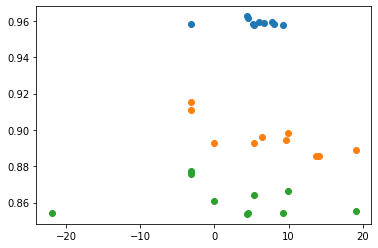

In [52]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(b, a, 'o')
plt.plot(d, c,'o')
plt.plot(f, e,'o ')

# plt.plot(h, g)
# plt.plot(j, i)
# plt.plot(l, k)

In [138]:
top_2_idx

array([ 123,  343,   96,  910,  908,  957,  130, 1117, 1084, 1078])